In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler


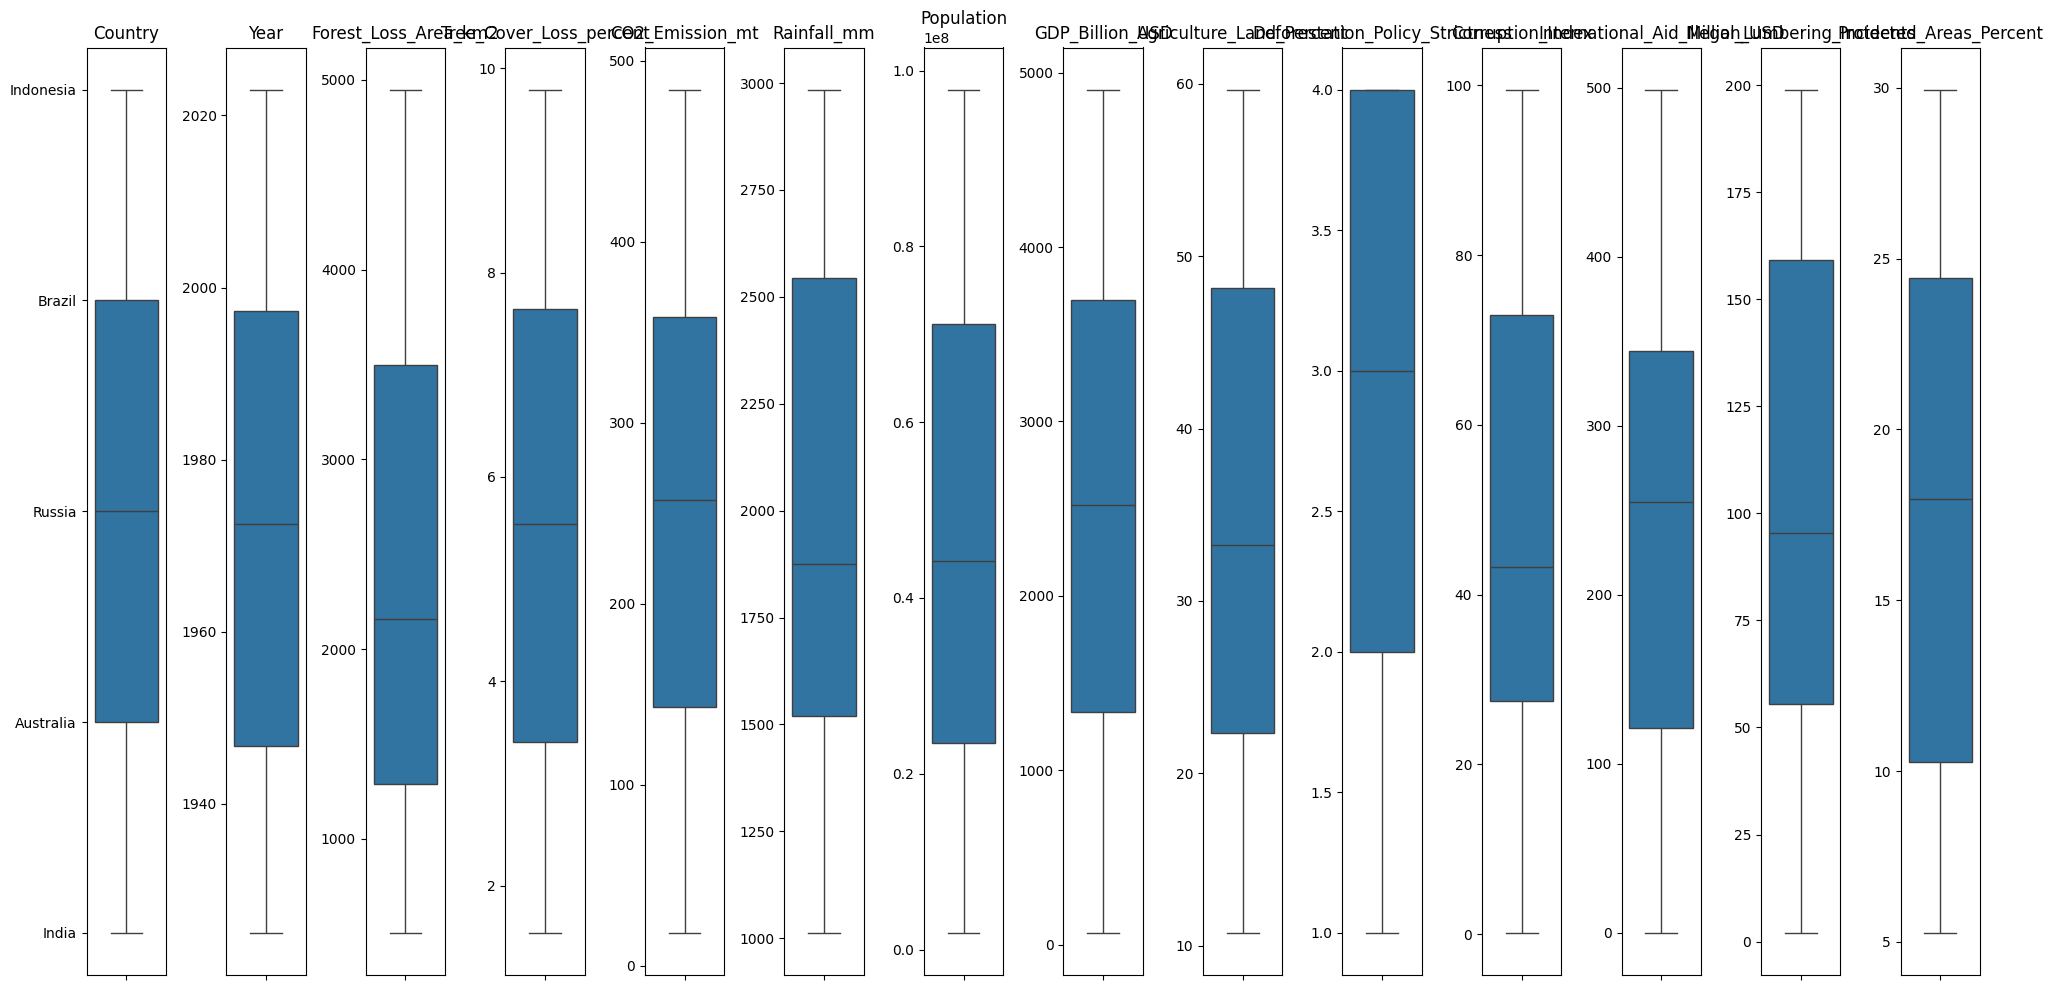

In [ ]:
df=pd.read_csv('deforestation_dataset.csv')

fig, axes = plt.subplots(1, len(df.columns), figsize=(20,10))
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

<Axes: >

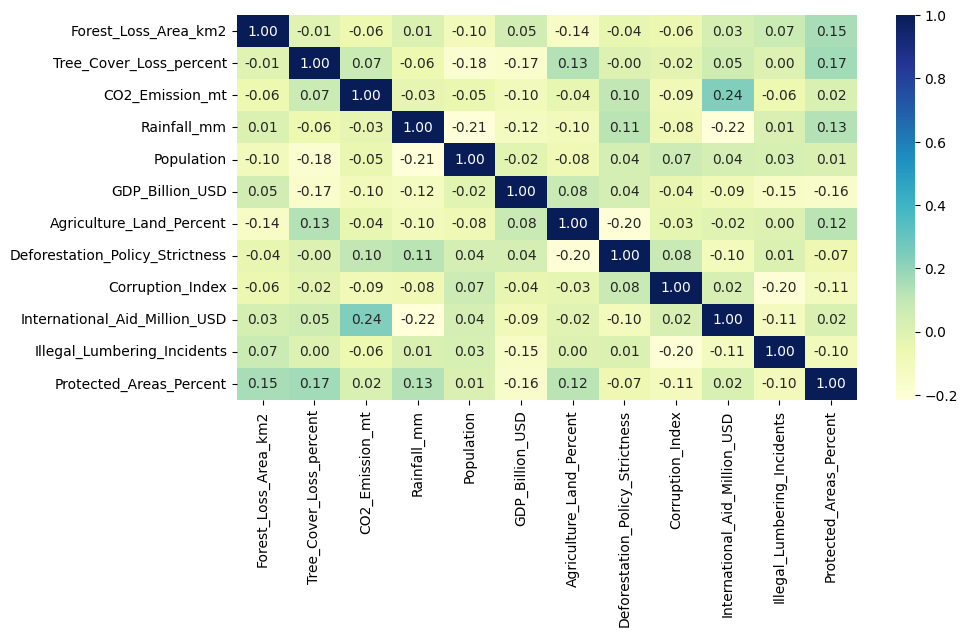

In [27]:
df_new = df.drop(['Year','Country'], axis=1)
plt.figure(figsize=(10,5)) 
sns.heatmap(df_new.corr(), annot=True, cmap='YlGnBu', fmt=".2f")

In [28]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_new)
normalized_df = pd.DataFrame(normalized_data, columns=df_new.columns)
normalized_df[['Country', 'Year']] = df[['Country', 'Year']]

In [29]:
normalized_df

,Forest_Loss_Area_km2,Tree_Cover_Loss_percent,CO2_Emission_mt,Rainfall_mm,Population,GDP_Billion_USD,Agriculture_Land_Percent,Deforestation_Policy_Strictness,Corruption_Index,International_Aid_Million_USD,Illegal_Lumbering_Incidents,Protected_Areas_Percent,Country,Year
0,0.012821,0.895570,0.613734,0.316067,0.884583,0.513911,0.992853,0.666667,0.093442,0.476954,0.923858,0.070733,Indonesia,1971
1,0.629780,0.375823,0.693133,0.224149,0.853720,0.531714,0.071035,1.000000,0.024759,0.837675,0.385787,0.598952,Brazil,1927
2,0.891363,0.380773,0.600858,0.371382,0.412655,0.581930,0.697606,0.333333,0.521135,0.372745,0.238579,0.708461,Russia,1961
3,0.709627,0.000000,0.572961,0.268371,0.725296,0.508475,0.001824,1.000000,0.237278,0.380762,0.000000,0.706588,Australia,1967
4,0.490103,0.787313,0.927039,0.375533,0.149801,0.112130,0.078517,1.000000,0.214205,0.318637,0.197970,0.519609,Australia,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.293747,0.001139,0.160944,0.447019,0.292160,0.671176,0.483674,0.333333,0.228665,0.583166,0.472081,0.768158,Australia,2005
96,0.340531,0.330508,0.905579,0.278281,0.833412,0.952675,0.795813,0.333333,0.074792,0.857715,0.025381,0.365592,Australia,2001
97,0.777553,0.094585,0.579399,0.218293,0.242741,0.064207,0.245577,1.000000,0.862405,0.531062,0.710660,0.000000,Australia,1981
98,0.441520,0.608818,0.334764,0.334333,0.110894,0.093231,0.134388,0.333333,0.375667,0.462926,0.979695,0.038555,Australia,1973


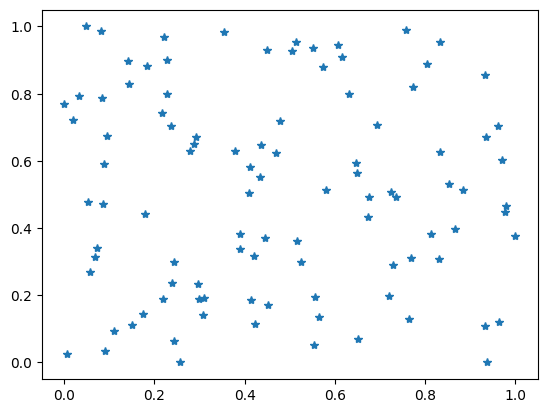

In [34]:
plt.plot(normalized_df['Population'],normalized_df['GDP_Billion_USD'],'*')
plt.show()

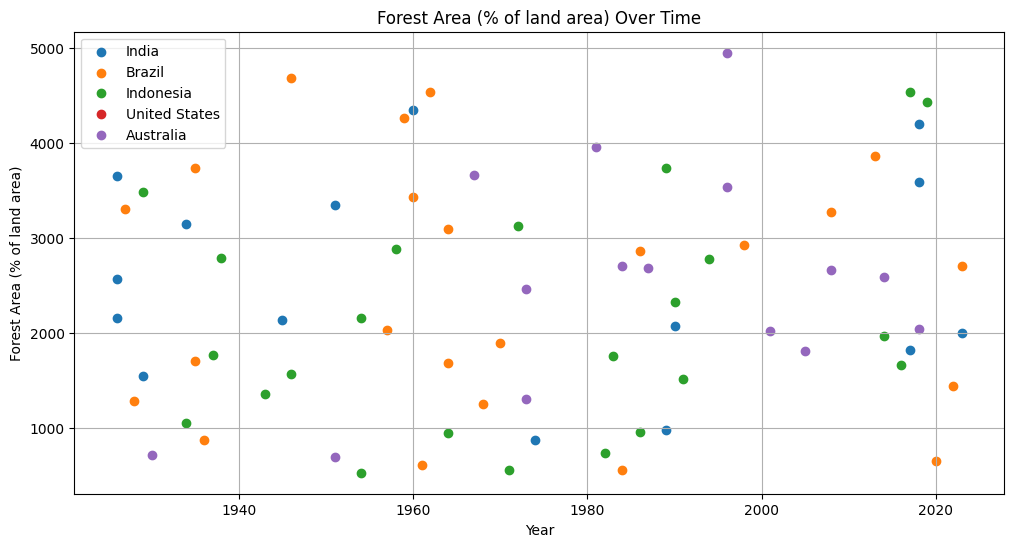

In [ ]:
selected_countries = ["India", "Brazil", "Indonesia", "United States", "Australia"]
normalized_df.sort_values(["Country","Year"])
plt.figure(figsize=(12,6))
for country in selected_countries:
    country_data = df[df["Country"] == country]
    plt.scatter(country_data["Year"], 
             country_data["Forest_Loss_Area_km2"], 
             marker='o', label=country)

plt.title("Forest Area (% of land area) Over Time")
plt.xlabel("Year")
plt.ylabel("Forest Area (% of land area)")
plt.legend()
plt.grid(True)
plt.show()
